<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project---Data-Cleaning" data-toc-modified-id="Project---Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project - Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The dataset</a></span></li><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Getting Started</a></span></li><li><span><a href="#Familiarize-yourself-with-the-dataset" data-toc-modified-id="Familiarize-yourself-with-the-dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Familiarize yourself with the dataset</a></span></li><li><span><a href="#Dealing-with-missing-values" data-toc-modified-id="Dealing-with-missing-values-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Dealing with missing values</a></span></li><li><span><a href="#Joining,-Grouping,-and-Aggregating" data-toc-modified-id="Joining,-Grouping,-and-Aggregating-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Joining, Grouping, and Aggregating</a></span></li><li><span><a href="#Some-Initial-Investigation" data-toc-modified-id="Some-Initial-Investigation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Some Initial Investigation</a></span><ul class="toc-item"><li><span><a href="#Sample-Question:-Most-Common-Powers" data-toc-modified-id="Sample-Question:-Most-Common-Powers-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Sample Question: Most Common Powers</a></span></li><li><span><a href="#Your-Own-Investigation" data-toc-modified-id="Your-Own-Investigation-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Your Own Investigation</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [40]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()
heroes_df.info() #Pubisher and Weight have obvious missing values--but there may be others missing info that aren't quite so obvious
#need to drop the unnamed column in heroes_df, account for missing vals in skin color signified with '-', and invalid weight vals signified with -99.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [41]:
powers_df.head()
powers_df.info()
#is there a weird empty column in between flight and web creation? Can't tell.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [42]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
display(heroes_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [43]:
display(heroes_df.describe())

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [44]:
display(powers_df.describe())

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Ozymandias,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [45]:
display(heroes_df.Height.unique()) #only -99 seems to be the NA value
display(heroes_df['Eye color'].unique()) #NA values are indicated by -
#len(heroes_df['Skin color'](lambda x: )) #id all skin colors signified with -
#len(heroes_df['Height']) #id all heights signified with -99.0 -
#len(heroes_df['Weight']) #id all weights signified with -99.0
heroes_df.dropna(inplace=True) #dropped the null values because there weren't that many of them and they won't present issues later on.
df = heroes_df.drop(heroes_df.columns.values[1:], axis=1)
columns = df.columns.values
display(columns)

array([203. , 191. , 185. , -99. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       175. , 198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. ,
       226. , 267. , 122. , 975. , 142. , 876. ,  62.5, 108. , 701. ,
       259. ,  79. , 155. ,  71. , 287. , 234. ,  64. , 366. , 206. ,
       305. , 297. , 137. , 279. ,  15.2, 140. , 160. , 304.8,  66. ])

array(['yellow', 'blue', 'green', 'brown', '-', 'red', 'violet', 'white',
       'purple', 'black', 'grey', 'silver', 'yellow / red',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue',
       'bown'], dtype=object)

array(['name'], dtype=object)

In [46]:
display(heroes_df.isnull().sum())
display(heroes_df.Gender.unique()) #should - be considered as missing data, or no gender specified?
display(heroes_df.Race.unique()) #should - be considered as missing data, or no race specified?
display(heroes_df.Alignment.unique()) #should - be considered as missing data, or no alignment specified?

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

array(['Male', 'Female', '-'], dtype=object)

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Saiyan', 'Gorilla', 'Rodian',
       'Flora Colossus', 'Human-Vuldarian', 'Asgardian', 'Demi-God',
       'Eternal', 'Gungan', 'Bolovaxian', 'Animal', 'Czarnian', 'Martian',
       'Spartoi', 'Planet', 'Luphomoid', 'Parademon', 'Yautja', 'Maiar',
       'Clone', 'Talokite', 'Korugaran', 'Zombie', 'Human-Vulcan',
       'Human-Spartoi', 'Tamaranean', 'Frost Giant', 'Mutant / Clone',
       "Yoda's species"], dtype=object)

array(['good', 'bad', '-', 'neutral'], dtype=object)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [47]:
#powers_df.isna().any().all()
#OR
powers_df.isna().any().any()
powers_df.info()
display(heroes_df.name.duplicated().sum()) #there are 19 duplicates in name column
display(powers_df['hero_names'].duplicated().sum()) #No duplicates in hero names for powers_df
#Drop duplicate names in heroes_df, because thats where you found duplicates.
heroes_df.drop_duplicates(inplace=True)
heroes_df.info()
heroes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


19

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 733
Data columns (total 10 columns):
name          718 non-null object
Gender        718 non-null object
Eye color     718 non-null object
Race          718 non-null object
Hair color    718 non-null object
Height        718 non-null float64
Publisher     718 non-null object
Skin color    718 non-null object
Alignment     718 non-null object
Weight        718 non-null float64
dtypes: float64(2), object(8)
memory usage: 61.7+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [48]:
#Reset index values--why? Because you dropped duplicate rows and it likely messed up indexing of rows--this will prevent weird number skips, Python recounts the amount of rows
heroes_df.reset_index(drop=True,inplace=True) #adds the index column again. It got removed during the last drop duplicates operation.
display(heroes_df.info())
heroes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 10 columns):
name          718 non-null object
Gender        718 non-null object
Eye color     718 non-null object
Race          718 non-null object
Hair color    718 non-null object
Height        718 non-null float64
Publisher     718 non-null object
Skin color    718 non-null object
Alignment     718 non-null object
Weight        718 non-null float64
dtypes: float64(2), object(8)
memory usage: 56.2+ KB


None

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [49]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
powers_df = powers_df.astype('str') #turns all data into 'object' datatypes to match the data types of both df name columns
powers_df.info()
heroes_df.info()
#Now combine dataframes with an inner join since they have a column in common?
powers_and_heroes_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
powers_and_heroes_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, name to Omniscient
dtypes: object(168)
memory usage: 875.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 10 columns):
name          718 non-null object
Gender        718 non-null object
Eye color     718 non-null object
Race          718 non-null object
Hair color    718 non-null object
Height        718 non-null float64
Publisher     718 non-null object
Skin color    718 non-null object
Alignment     718 non-null object
Weight        718 non-null float64
dtypes: float64(2), object(8)
memory usage: 56.2+ KB


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

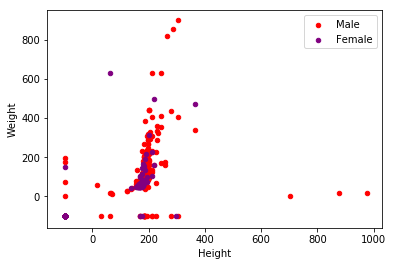

In [50]:
male_heroes_df = powers_and_heroes_df[powers_and_heroes_df['Gender'] == 'Male']
female_heroes_df = powers_and_heroes_df[powers_and_heroes_df['Gender'] == 'Female']

ax=male_heroes_df.plot.scatter(x='Height', y='Weight', c='red', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='purple', label='Female', ax=ax) #adding the ax=ax at the end puts these 2 on the same plot

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [51]:
def show_distplot(dataframe, gender, column_name):
    plt.plot() #initializes the plot
    dataframe[column_name].hist()#creates a histogram from the input column
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show() #always gotta end with this!

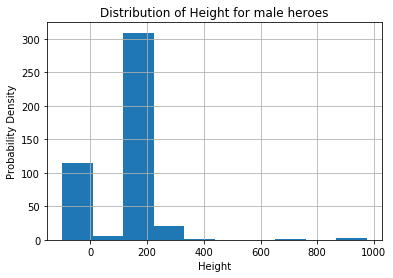

Mean height for male heroes: 119.1068281938326
Median height for male heroes: 183.0


In [52]:
# Male Height
show_distplot(male_heroes_df, 'male', 'Height')
print('Mean height for male heroes: {}'.format(male_heroes_df.Height.mean()))
print('Median height for male heroes: {}'.format(male_heroes_df.Height.median()))

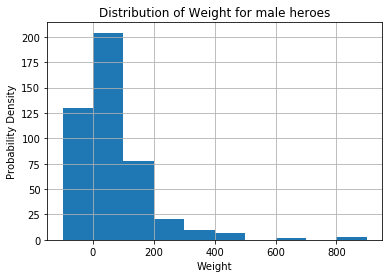

Mean weight for male heroes: 62.02643171806167
Median weight for male heroes: 79.5


,Height,Weight
count,454.000000,454.000000
mean,119.106828,62.026432
std,140.761914,139.670550
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,183.000000,79.500000
75%,188.000000,101.000000
max,975.000000,900.000000


In [53]:
# Male Weight
show_distplot(male_heroes_df, 'male', 'Weight')
print('Mean weight for male heroes: {}'.format(male_heroes_df.Weight.mean()))
print('Median weight for male heroes: {}'.format(male_heroes_df.Weight.median()))
male_heroes_df.describe()

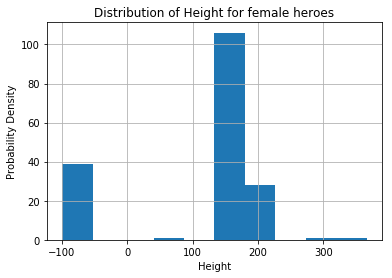

Mean height for female_heroes_df: 114.08806818181819
Median height for female_heroes_df: 168.0


In [54]:
# Female Height
show_distplot(female_heroes_df, 'female', 'Height')
print('Mean height for female_heroes_df: {}'.format(female_heroes_df.Height.mean()))
print('Median height for female_heroes_df: {}'.format(female_heroes_df.Height.median()))

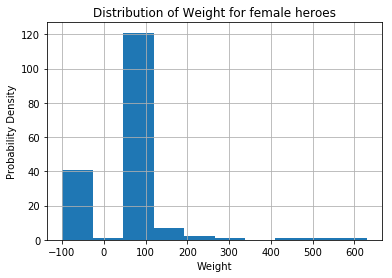

Mean weight for female_heroes_df: 38.19318181818182
Median weight for female_heroes_df: 55.0


,Height,Weight
count,176.000000,176.000000
mean,114.088068,38.193182
std,116.008421,102.498040
min,-99.000000,-99.000000
25%,161.500000,49.000000
50%,168.000000,55.000000
75%,175.000000,61.000000
max,366.000000,630.000000


In [55]:
# Female Weight
show_distplot(female_heroes_df, 'female', 'Weight')
print('Mean weight for female_heroes_df: {}'.format(female_heroes_df.Weight.mean()))
print('Median weight for female_heroes_df: {}'.format(female_heroes_df.Weight.median()))
female_heroes_df.describe()

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

There are -99 values in the female and male height and weight datasets that are bringing down the averages and medians. You can see this from the plots that have x-axis values below 0 and the tables of summary statistics for both male and female datasets. These are not possible heights and weights.


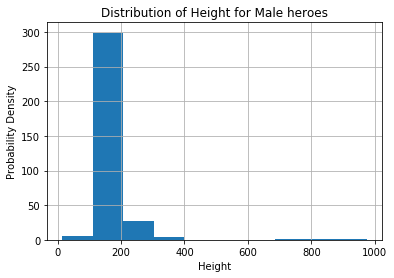

Mean Height for Male heroes: 193.09587020648968
Median Height for Male heroes: 185.0


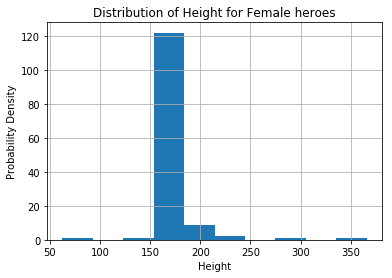

Mean Height for Female heroes: 174.74817518248176
Median Height for Female heroes: 170.0


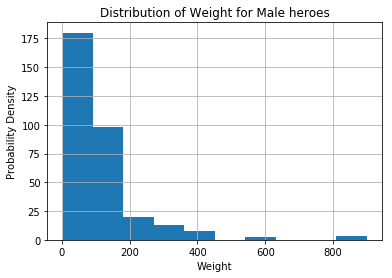

Mean Weight for Male heroes: 126.6358024691358
Median Weight for Male heroes: 90.0


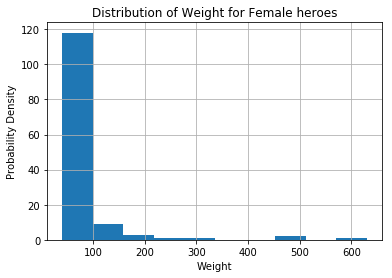

Mean Weight for Female heroes: 79.85925925925926
Median Weight for Female heroes: 58.0


In [58]:
for feat in ['Height', 'Weight']:
    df = powers_and_heroes_df[powers_and_heroes_df[feat]>0] #temporarily removes negatives
    for group in ['Male', 'Female']:
        show_distplot(df[df['Gender']==group], group, feat)
        print('Mean {} for {} heroes: {}'.format(feat, group, df[df['Gender']==group][feat].mean()))
        print('Median {} for {} heroes: {}'.format(feat, group, df[df['Gender']==group][feat].median()))
    

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [59]:
#What are the 5 most common powers overall?
def top_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1) #returns a NumPy array of names
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum()) #will count up the occurences of each power and store the counts in a dict.
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]

overall_top_5 = top_powers(powers_and_heroes_df)
marvel_df = powers_and_heroes_df[powers_and_heroes_df['Publisher'] == 'Marvel Comics']
dc_df = powers_and_heroes_df[powers_and_heroes_df['Publisher'] == 'DC Comics']
print(overall_top_5)

[('Super Strength', 357), ('Stamina', 286), ('Durability', 256), ('Super Speed', 248), ('Agility', 236)]


In [63]:
marvel_tops = top_powers(marvel_df)

In [64]:
dc_tops = top_powers(dc_df)

<Figure size 432x288 with 0 Axes>

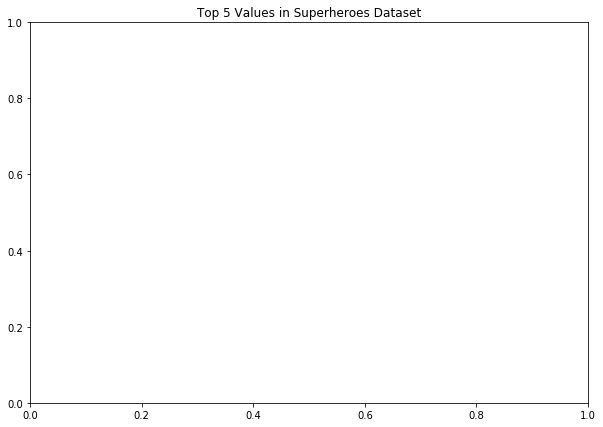

None

<Figure size 432x288 with 0 Axes>

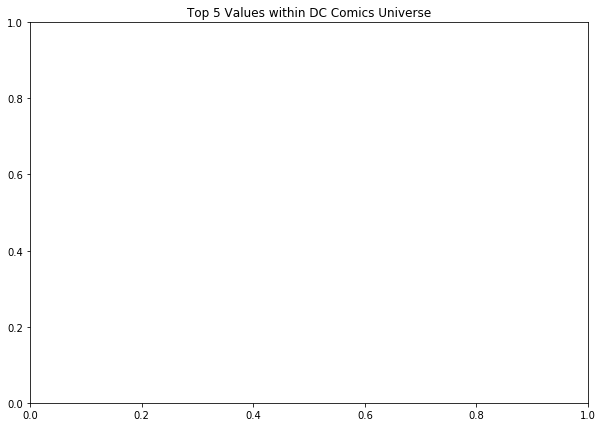

None

<Figure size 432x288 with 0 Axes>

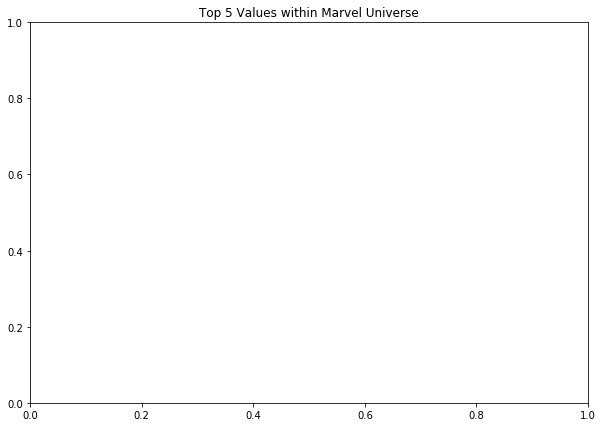

None

In [67]:
def top_5_barchart(top_5_list, publisher=None):
    publisher_powers = [i[0] for i in top_5_list] #grabs the first element in every pair above (the power name)
    publisher_values = [i[1] for i in top_5_list] #grabs the first element in every pair above (the counts for each power)
    plt.clf() #clears the current figure
    plt.figure(figsize=(10,7)) #just experimenting with sizes here
    bar_positions = np.arange(len(publisher_powers))
    plt.bar = (bar_positions, publisher_values) #input the definiton for the bar distribution, then the value counts for each power (height of bars, basically)
    plt.xticks = (bar_positions, publisher_powers) #you want the same amount of xticks as bars, so use bar_positions
    if publisher:
        plt.title('Top 5 Values within {} Universe'.format(publisher))
    else:
        plt.title('Top 5 Values in Superheroes Dataset')
    plt.show() #make sure you call this outside of the if/else statement!

display(top_5_barchart(overall_top_5))
display(top_5_barchart(dc_tops, 'DC Comics'))
display(top_5_barchart(marvel_tops, 'Marvel'))

        
    

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
#The top 5 powers in the Marvel and DC universe and fairly similar, with super strength being the most common of both. However, Marvel Comics makes heavy use of durability, while DC makes use of flight Marvel comics must be more prevalent in this dataset, as the Marvel top 5 powers match well to the overall dataset's power popularity.-


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data